<a href="https://colab.research.google.com/github/gonzopunk/data-science-projects/blob/main/Olympics_EDA_FINAL_REVISED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olympics EDA FINAL
Jamey Findling

## About this Data Set

### Summary
Olympics data from 1896-2018

**Data Source**

[120 years of Olympic history: athletes and results – Kaggle.com](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

**Description**

From the Kaggle page:

“This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.”

“Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four-year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.”

**Files**

Two CSV files:

- `athlete_events.csv`: 271,116 rows, 15 columns
- `noc_regions.csv`: 230 rows, 3 columns


## Data Dictionary

### Fields in `athlete_events.csv`

271,116 records, each representing an event in which the athlete competed. (If an athlete competed in 15 events, the athlete will have 15 entries.)

- ID: Unique number for each athlete
- Name: Athlete’s full name
- Sex: M or F
- Age: Age when competed in this specific Olympic event
- Height: Height in centimeters
- Weight: Weight in kilograms
- Team: The specific team on which the athlete competed. (This is not identical to country or National Olympic Committee Region. An NOC region may have multiple teams.)
- NOC: National Olympic Committee 3-letter code
- Games: Year and season of the Olympic games for this event
- Year: Year as a four-digit integer
- Season: Summer or Winter
- City: Host city
- Sport: A parent category of the Event
- Event: Specific event in which the athlete competed.
- Medal: Gold, Silver, Bronce, or null (for no medal)

### Fields in `noc_regions.csv`

230 Records, each representing an National Olympic Committee and its region (aka country)

- NOC:National Olympic Committee three-letter code
- region: Country name
- notes: usually null, but a small number of records have a note about details that might be unclear regarding the NOC and region

# Import Libraries and Set Notebook Defaults


In [97]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read, Review, and Prep Data

## Read and Merge Data Files

In [98]:
# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# Read Excel data file
df = pd.read_csv('/content/drive/MyDrive/Data Science Student Work/2025SP_1 Descriptive Analytics/Olympics EDA/data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [100]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [101]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26746,13922,Dany Bouchard,M,26.0,177.0,75.0,Canada,CAN,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
74793,37958,"Jarmila Gajdoov (-Groth-, -Wolfe)",F,25.0,173.0,68.0,Australia-1,AUS,2012 Summer,2012,Summer,London,Tennis,Tennis Women's Doubles,NaN
205642,103230,Bernd Rcker,M,31.0,181.0,82.0,Germany,GER,1996 Summer,1996,Summer,Atlanta,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",NaN
225326,113211,Thomas Holmn Sopp,M,20.0,182.0,75.0,Norway,NOR,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN
102460,51823,Salim Iles,M,25.0,188.0,88.0,Algeria,ALG,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Freestyle,NaN


In [102]:
# Get number of rows, columns
df.shape

(271116, 15)

In [103]:
# Get fundamental info about DataFrame (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [104]:
# Get basic statistical information about df
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [105]:
# Get description of non-numeric fields
df.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


## File Merge: `athlete events` with `noc regions`

In [106]:
# Read noc_regions.csv to prepare for merge
df_noc = pd.read_csv('/content/drive/MyDrive/Data Science Student Work/2025SP_1 Descriptive Analytics/Olympics EDA/data/noc_regions.csv')
df_noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [107]:
df_noc.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [108]:
df_noc.shape

(230, 3)

In [109]:
df_noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [110]:
df_noc.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [111]:
# Drop notes field (since we just want country and there are only 21 rows with notes)
df_noc.drop('notes', axis=1, inplace=True)
df_noc.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [112]:
# Count the number of unique regions
num_regions = df_noc['region'].nunique()

print(f"There are {num_regions} different regions.")


There are 206 different regions.


In [113]:
# Merge df with df_noc (note that we now have redefined df)
df = df.merge(df_noc, how='left', on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [114]:
df.info()    # note additional column 15 ("region")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 33.1+ MB


In [115]:
df.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,region
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783,270746
unique,134732,2,1184,230,51,2,42,66,765,3,205
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold,USA
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372,18853


In [116]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [117]:
# Move region after Team and rename to Country
str(list(df.columns))

"['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region']"

In [118]:
new_order = ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'region', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']
df = df[new_order]
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [119]:
df.rename(columns={'region': 'Country'}, inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [120]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,Poland,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [121]:
df.sample(20)

,ID,Name,Sex,Age,Height,Weight,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
3549,2029,Saeed bin Hasher Al-Maktoum,M,27.0,176.0,88.0,United Arab Emirates,United Arab Emirates,UAE,2004 Summer,2004,Summer,Athina,Shooting,Shooting Men's Skeet,NaN
87005,44130,Bridgette Marie Gusterson (-Ireland),F,27.0,180.0,74.0,Australia,Australia,AUS,2000 Summer,2000,Summer,Sydney,Water Polo,Water Polo Women's Water Polo,Gold
128883,64878,Caroline Aiko Kumahara,F,16.0,166.0,66.0,Brazil,Brazil,BRA,2012 Summer,2012,Summer,London,Table Tennis,Table Tennis Women's Team,NaN
179422,90163,Konstantns Oviikovs,M,28.0,187.0,81.0,Latvia,Latvia,LAT,2012 Summer,2012,Summer,London,Judo,Judo Men's Half-Middleweight,NaN
32688,16811,"Margarete ""Margret"" Buscher",F,26.0,168.0,62.0,Germany,Germany,GER,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's 400 metres,NaN
32334,16616,"Thomas Edmund ""Tom"" Burke",M,21.0,183.0,66.0,United States,USA,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 400 metres,Gold
26512,13800,Wollmar Filip Bostrm,M,33.0,NaN,NaN,Sweden,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Men's Singles, Covered Courts",NaN
41773,21532,Rosella Cicognani,F,20.0,158.0,49.0,Italy,Italy,ITA,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Women's Balance Beam,NaN
214440,107656,Aleksandr Schultz,M,19.0,NaN,NaN,Russia,Russia,RUS,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Long Jump,NaN
170952,85920,Walter Niederle,M,27.0,NaN,NaN,Austria,Austria,AUT,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN


## Review Merged DataFrame

In [122]:
df.shape

(271116, 16)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Name     271116 non-null  object 
 2   Sex      271116 non-null  object 
 3   Age      261642 non-null  float64
 4   Height   210945 non-null  float64
 5   Weight   208241 non-null  float64
 6   Team     271116 non-null  object 
 7   Country  270746 non-null  object 
 8   NOC      271116 non-null  object 
 9   Games    271116 non-null  object 
 10  Year     271116 non-null  int64  
 11  Season   271116 non-null  object 
 12  City     271116 non-null  object 
 13  Sport    271116 non-null  object 
 14  Event    271116 non-null  object 
 15  Medal    39783 non-null   object 
dtypes: float64(3), int64(2), object(11)
memory usage: 33.1+ MB


In [124]:
# Check number of unique values per field
print(df.nunique())

ID         135571
Name       134732
Sex             2
Age            74
Height         95
Weight        220
Team         1184
Country       205
NOC           230
Games          51
Year           35
Season          2
City           42
Sport          66
Event         765
Medal           3
dtype: int64


In [125]:
# Count values for each field
print(df.count())

ID         271116
Name       271116
Sex        271116
Age        261642
Height     210945
Weight     208241
Team       271116
Country    270746
NOC        271116
Games      271116
Year       271116
Season     271116
City       271116
Sport      271116
Event      271116
Medal       39783
dtype: int64


In [126]:
# Count null values for each field
df.isna().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
Country,370
NOC,0
Games,0


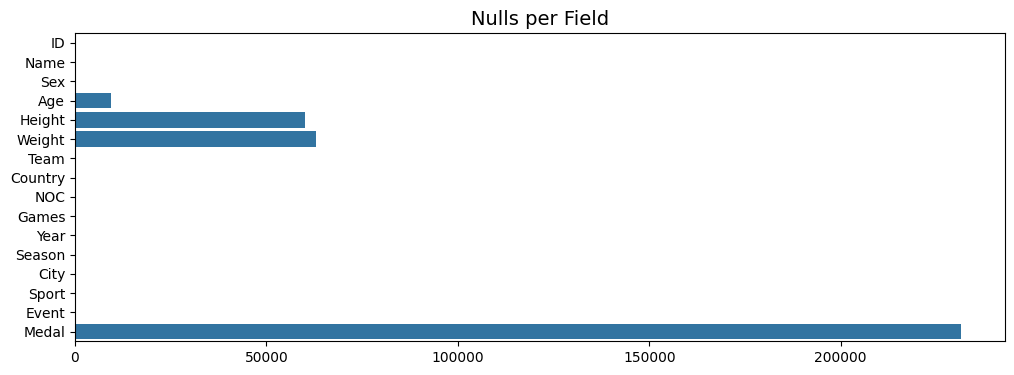

In [127]:
  plt.figure(figsize=(12,4))
  plt.title('Nulls per Field', fontsize=14)
  data = df.isna().sum()
  ax = sns.barplot(data, orient='h')

# Cleaning Steps

## Setting Data Types

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Name     271116 non-null  object 
 2   Sex      271116 non-null  object 
 3   Age      261642 non-null  float64
 4   Height   210945 non-null  float64
 5   Weight   208241 non-null  float64
 6   Team     271116 non-null  object 
 7   Country  270746 non-null  object 
 8   NOC      271116 non-null  object 
 9   Games    271116 non-null  object 
 10  Year     271116 non-null  int64  
 11  Season   271116 non-null  object 
 12  City     271116 non-null  object 
 13  Sport    271116 non-null  object 
 14  Event    271116 non-null  object 
 15  Medal    39783 non-null   object 
dtypes: float64(3), int64(2), object(11)
memory usage: 33.1+ MB


**Comment**: These datatypes look ok to me. We could change age, height, and weight to be integers to eliminate the '.0' at the end, but this would prevent us from having fractional ages, heights, or weights, which could be desirable at some point.

### Checking for Outliers

In [129]:
df.Sex.value_counts()    # significantly more males than females -- makes sense

,count
Sex,
M,196594
F,74522


In [130]:
df.Age.describe()    # ages range from 10 to 97 -- surprising, but not impossible

,Age
count,261642.000000
mean,25.556898
std,6.393561
min,10.000000
25%,21.000000
50%,24.000000
75%,28.000000
max,97.000000


In [131]:
df.Height.describe()    # heights range from 127 cm (about 4'2") to 226 cm (about 7'5") -- also possible

,Height
count,210945.000000
mean,175.338970
std,10.518462
min,127.000000
25%,168.000000
50%,175.000000
75%,183.000000
max,226.000000


In [132]:
df.Weight.describe()    # weights range from 25 kg to 214 kg
                        # 25 kg is ~55 lbs -- not sure that's possible; let's look into this
                        # 214 kg is ~471 lbs -- I don't think sumo has ever been an Olympic sport, but possibly a weightlifter?

,Weight
count,208241.000000
mean,70.702393
std,14.348020
min,25.000000
25%,60.000000
50%,70.000000
75%,79.000000
max,214.000000


In [133]:
# Filter rows where Weight is less than 30
filtered_df = df[df['Weight'] < 30]

# Display the filtered rows
filtered_df

,ID,Name,Sex,Age,Height,Weight,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
40849,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN
40850,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,NaN
40851,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN
40852,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN
40853,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN
40854,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Balance Beam,NaN
109863,55553,Anita Jokiel,F,13.0,142.0,28.0,Poland,Poland,POL,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN
109864,55553,Anita Jokiel,F,13.0,142.0,28.0,Poland,Poland,POL,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,NaN
109865,55553,Anita Jokiel,F,13.0,142.0,28.0,Poland,Poland,POL,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN
109866,55553,Anita Jokiel,F,13.0,142.0,28.0,Poland,Poland,POL,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN


**Comment**: Weights under 30 kg (about 66 lbs) are highly doubtful, even for teenaged female gymnasts. but in particular, common sense dictates that no 24-year-old male football player could weigh 28 kg. However, it is not clear what these values should be.

For now, let's assume Albert Zerhusen's weight is a typo and that his correct weight should be 78 kg (about 172 lbs). Checking other sources might be necessary to ensure the accuracy of this data.

In [134]:
df.loc[268586, 'Weight'] = 78
df.loc[268586]

,268586
ID,134370
Name,"Albert Ferdinand ""Al"" Zerhusen"
Sex,M
Age,24.0
Height,183.0
Weight,78.0
Team,United States
Country,USA
NOC,USA
Games,1956 Summer


# Exploratory Data Analysis

## Histograms

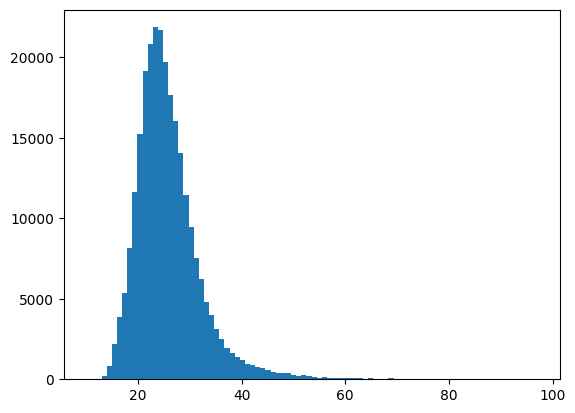

In [135]:
# Histogram for Age
plt.hist(df.Age, bins=88);

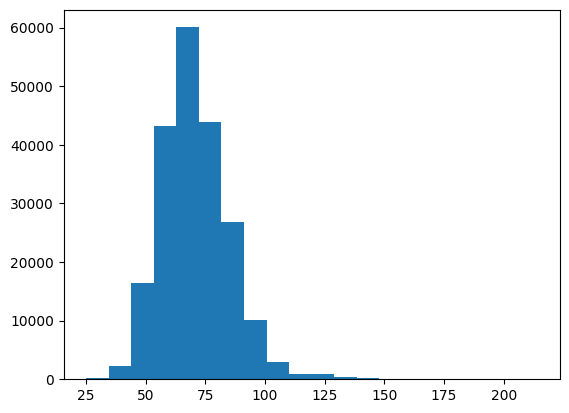

In [136]:
# Histogram for Weight
plt.hist(df.Weight, bins=20);

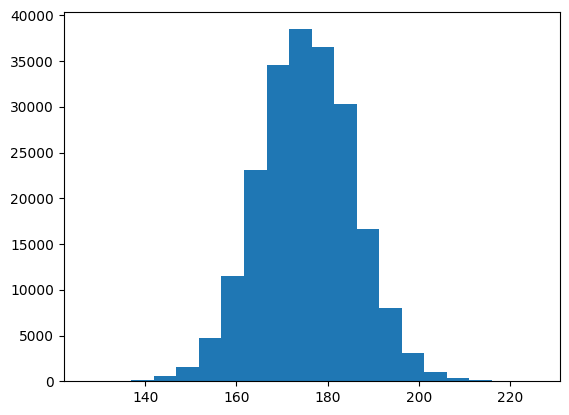

In [137]:
# Histogram for Height
plt.hist(df.Height, bins=20);

### Interpretation of Histograms
These charts show a fairly wide spread of ages, weights, and heights among Olympic competitors over the years. I used a high number of bins for age in order to get one bar per year. I used fewer bins for weight and height, thinking about the idea of "weight classes".

The long "tail" in the age chart is due to the presence of a 97-year-old athlete in the dataset. While this is perhaps possible, a Google search indicates that the oldest Olympian was "only" 72. This is something that should be fixed in the data cleaning process.

## Box Plots

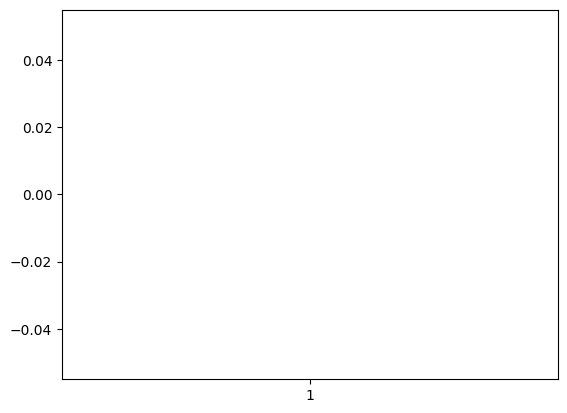

In [138]:
# Age box plot
plt.boxplot(df['Age']);    # why doesn't this work?

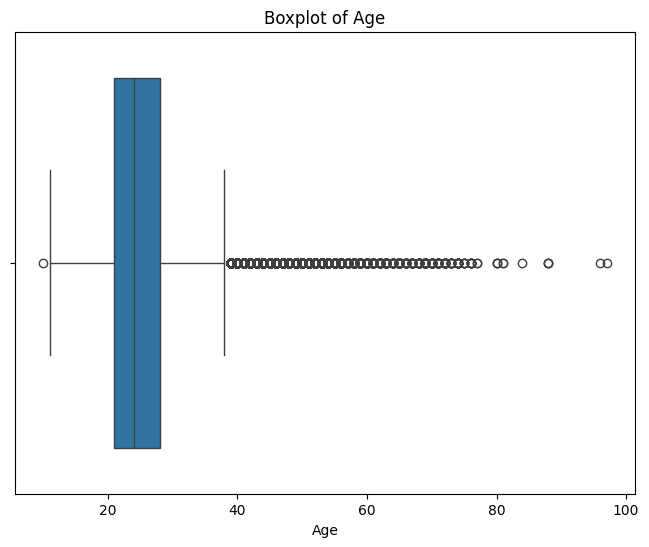

In [139]:
# prompt: create a boxplot for age

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()


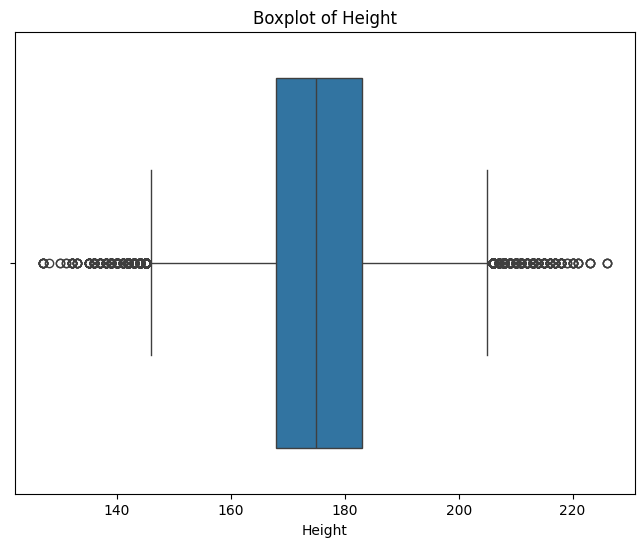

In [140]:
# Box plot for Height

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Height'])
plt.title('Boxplot of Height')
plt.show()

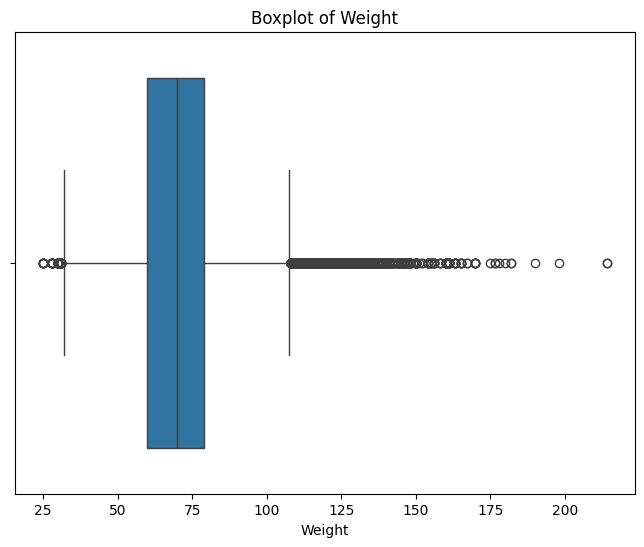

In [141]:
# Box plot for Weight

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Weight'])
plt.title('Boxplot of Weight')
plt.show()

### Interpretation of Boxplots
These convey similar information as the histograms, but with more statistical nuance.

We see the middle quartiles of Height are wider than those of Weight, while the outliers are fewer and do not extend as far. This suggests that there is less variance in Olympic height than weight.

We can also see that ages, unsurprisingly, skew quite low. Athletic ability generally peaks early in life, although there are a surprising number of outliers on the higher end.

## Categorical Fields: Bar Charts

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Name     271116 non-null  object 
 2   Sex      271116 non-null  object 
 3   Age      261642 non-null  float64
 4   Height   210945 non-null  float64
 5   Weight   208241 non-null  float64
 6   Team     271116 non-null  object 
 7   Country  270746 non-null  object 
 8   NOC      271116 non-null  object 
 9   Games    271116 non-null  object 
 10  Year     271116 non-null  int64  
 11  Season   271116 non-null  object 
 12  City     271116 non-null  object 
 13  Sport    271116 non-null  object 
 14  Event    271116 non-null  object 
 15  Medal    39783 non-null   object 
dtypes: float64(3), int64(2), object(11)
memory usage: 33.1+ MB


In [143]:
data = df['Sex'].value_counts()
data

,count
Sex,
M,196594
F,74522


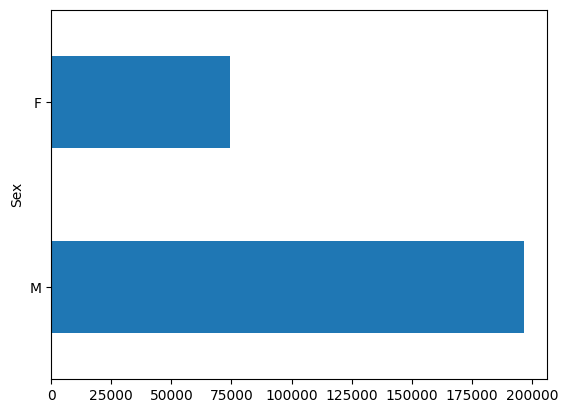

In [144]:
# Sex of athletes
data.plot.barh();

### Interpretation of Sex
There have been almost three times as many male athletes as female.

In [145]:
data = df['Country'].value_counts()
data

,count
Country,
USA,18853
Germany,15883
France,12758
UK,12256
Russia,11692
...,...
Kiribati,11
Brunei,10
Timor-Leste,9


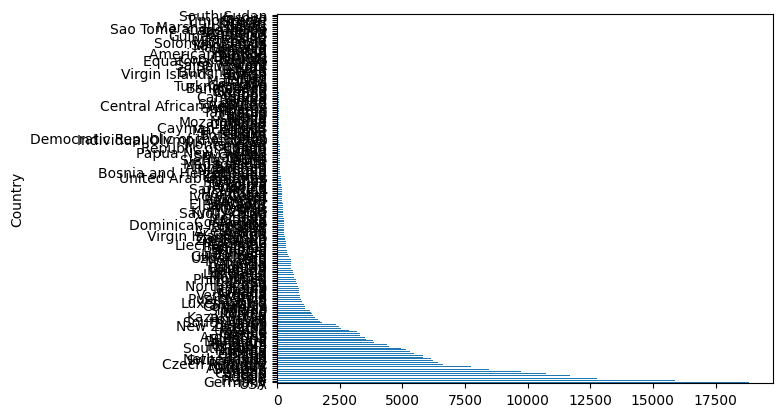

In [157]:
data.plot.barh();

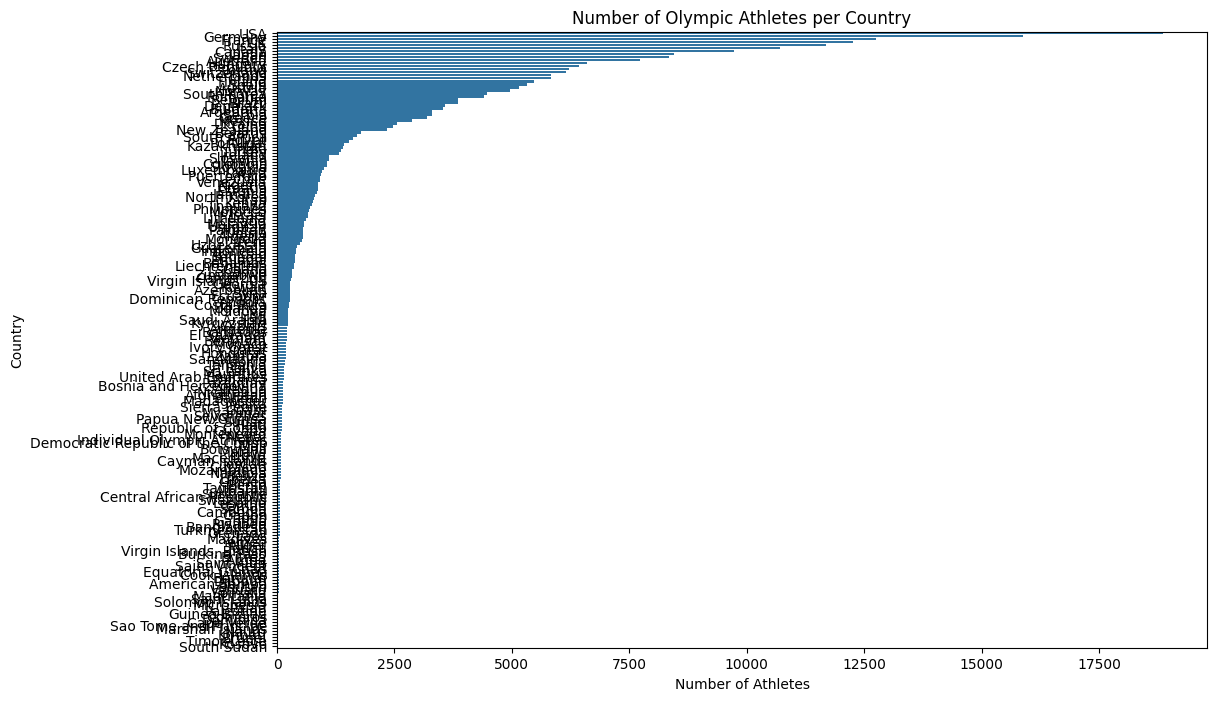

In [147]:
# prompt: create a horizontal bar chart for Country

data = df['Country'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=data.values, y=data.index)
plt.title('Number of Olympic Athletes per Country')
plt.xlabel('Number of Athletes')
plt.ylabel('Country')
plt.show()


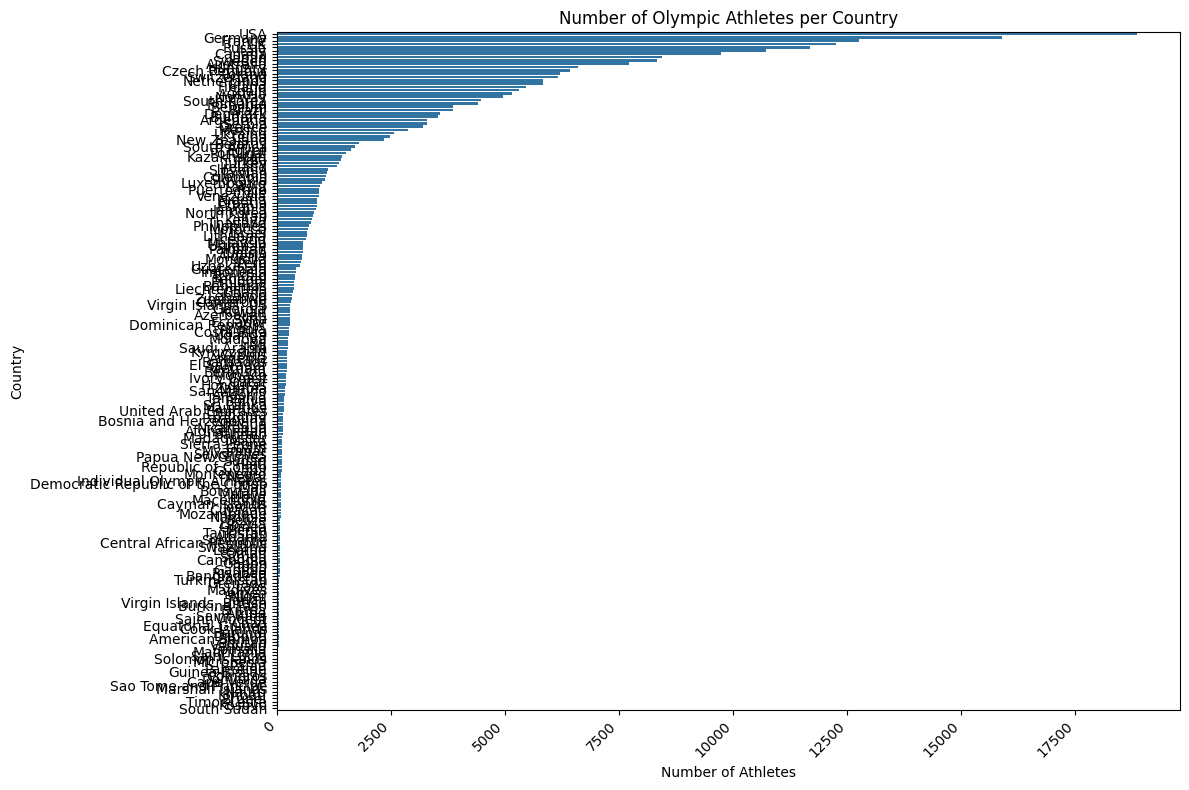

In [158]:
# prompt: make the previous bar chart more readable

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is already defined as the result of df['Country'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=data.values, y=data.index)
plt.title('Number of Olympic Athletes per Country')
plt.xlabel('Number of Athletes')
plt.ylabel('Country')

# Enhancements for readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


### Interpretation of Country
It is hard to get much out of this chart because there are too many countries for them to be readable. Gemini was not very helpful when I asked for help on this.

In [ ]:
# prompt: suggest a useful EDA categorical visualization for this data

A countplot or bar plot of the 'Sport' column would be a useful EDA visualization.  This would show the distribution of athletes across different sports throughout the Olympic history covered in the dataset.  It would help identify which sports have historically had the most participants.  You could further enhance this by breaking down the sport counts by season (summer/winter) or by medal counts to see if certain sports have higher medal rates.


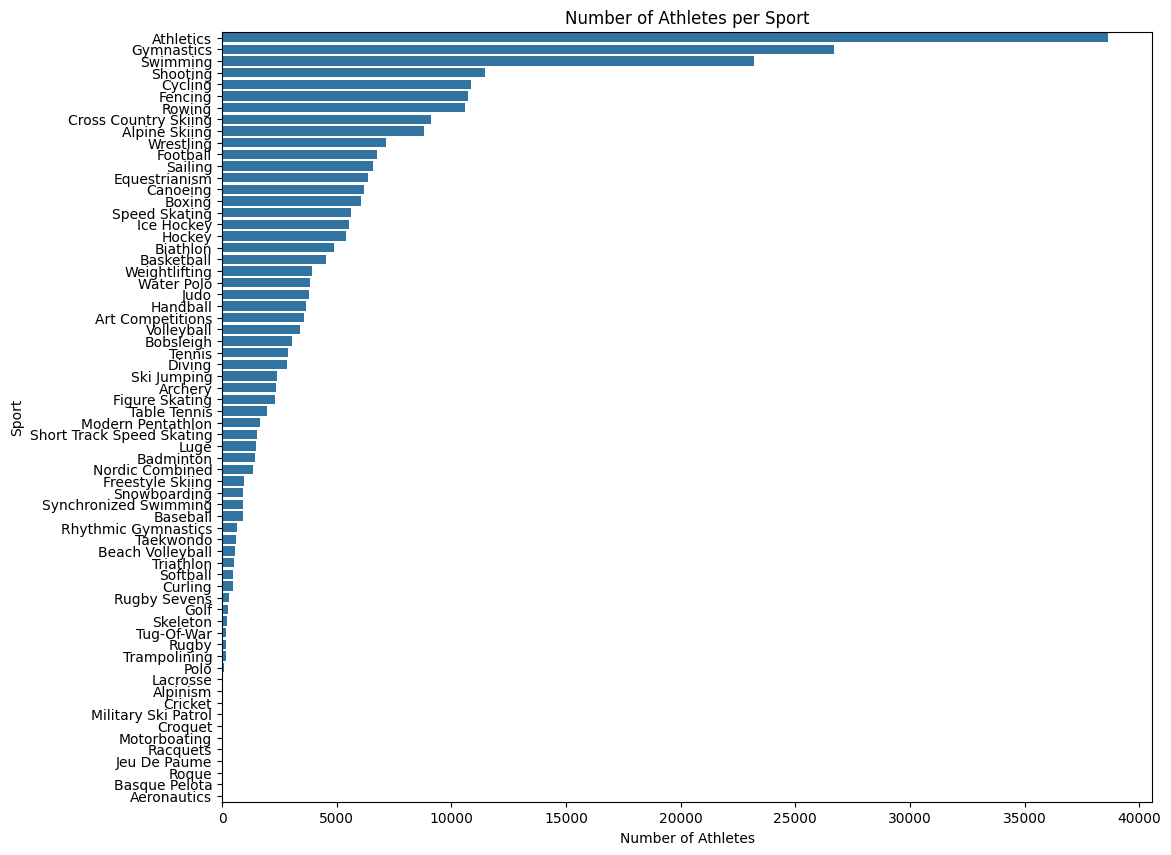

In [160]:
# prompt: create a countplot for

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df'
plt.figure(figsize=(12, 10))
sns.countplot(y='Sport', data=df, order=df['Sport'].value_counts().index) # order by frequency
plt.title('Number of Athletes per Sport')
plt.xlabel('Number of Athletes')
plt.ylabel('Sport')
plt.show()


     Decade          Sport  athlete_count
0      1890      Athletics            106
1      1890        Cycling             41
2      1890        Fencing             15
3      1890     Gymnastics             97
4      1890       Shooting             65
..      ...            ...            ...
418    2010      Triathlon            220
419    2010     Volleyball            570
420    2010     Water Polo            515
421    2010  Weightlifting            507
422    2010      Wrestling            685

[423 rows x 3 columns]


<ipython-input-161-4489e0bd2b6e>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


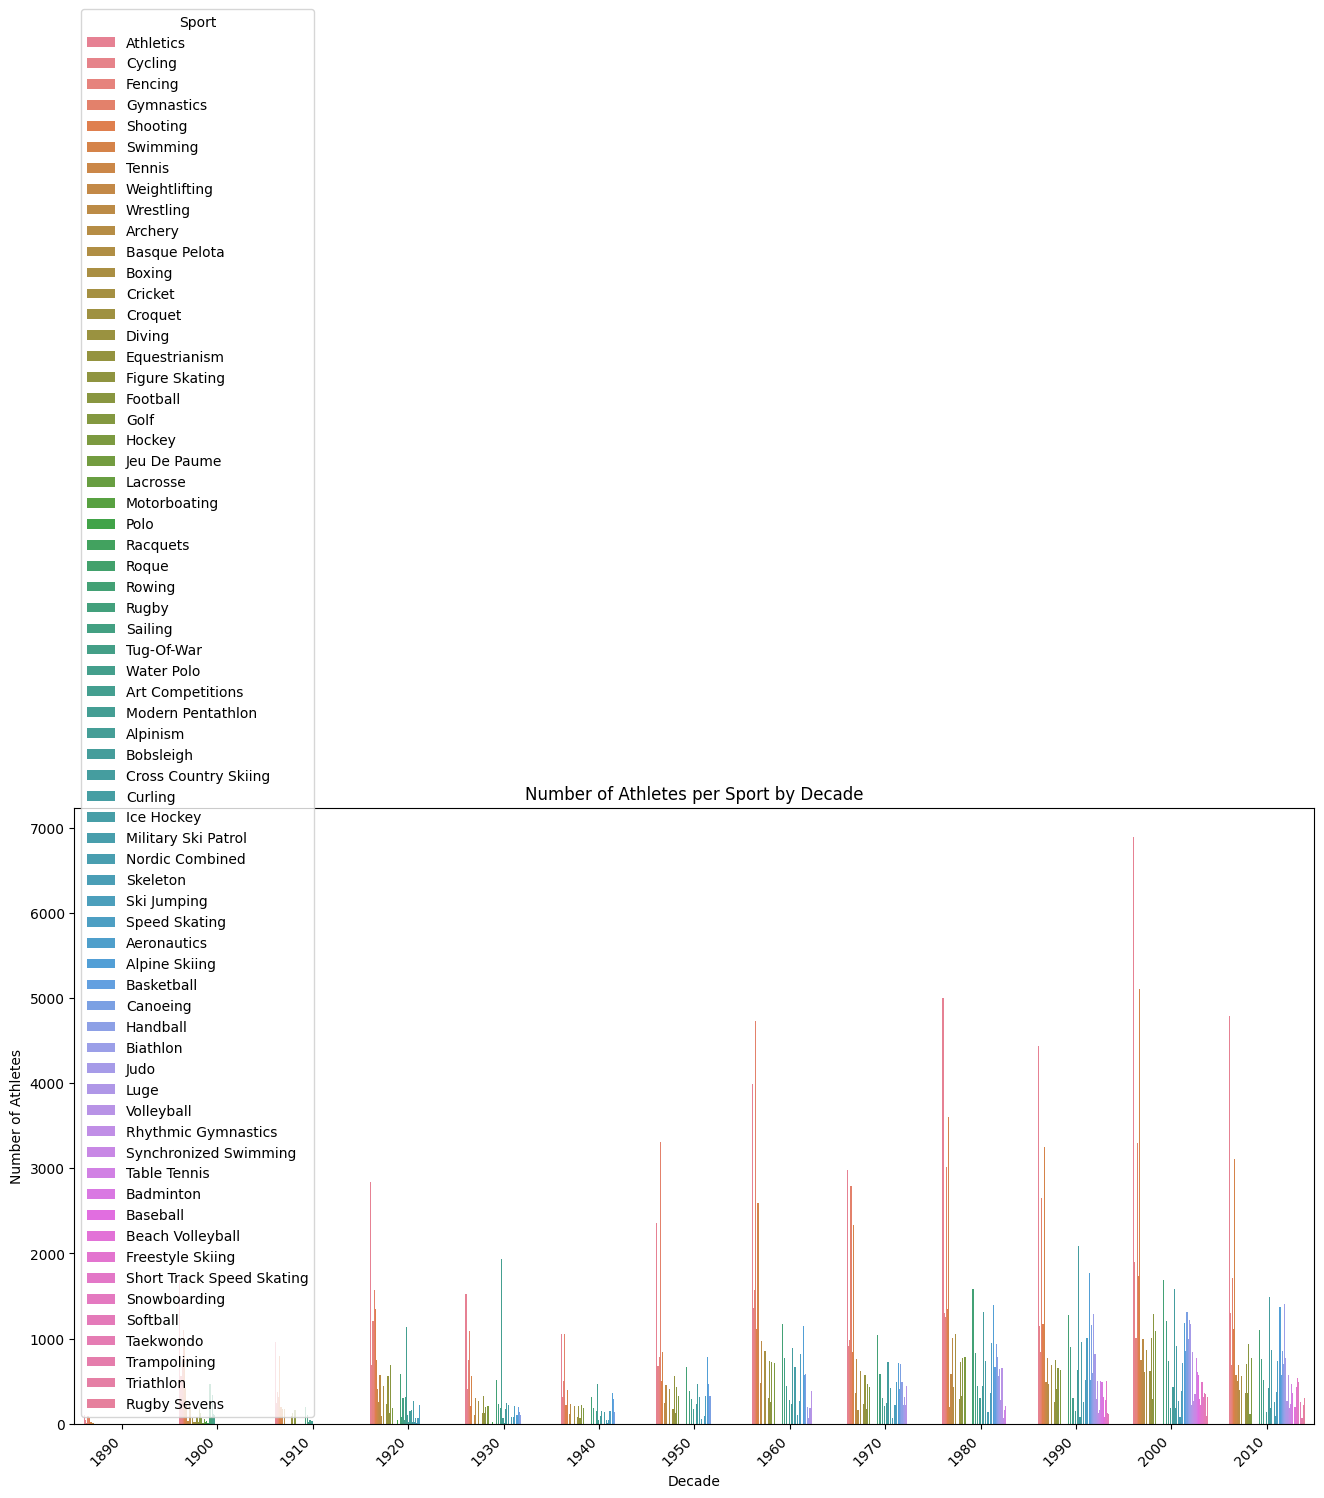

In [161]:
# prompt: can you add a breakdown by decade of the number of athletes by sport

# Assuming your dataframe is named 'df'
# Create a decade column
df['Decade'] = (df['Year'] // 10) * 10

# Group by decade and sport, then count athletes
decade_sport_counts = df.groupby(['Decade', 'Sport'])['ID'].count().reset_index()

#Rename the column to athlete_count
decade_sport_counts = decade_sport_counts.rename(columns={'ID': 'athlete_count'})

# Display the breakdown
print(decade_sport_counts)

# Optional: Visualization
plt.figure(figsize=(16, 8))
sns.barplot(x='Decade', y='athlete_count', hue='Sport', data=decade_sport_counts)
plt.title('Number of Athletes per Sport by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-162-5f2f40107819>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


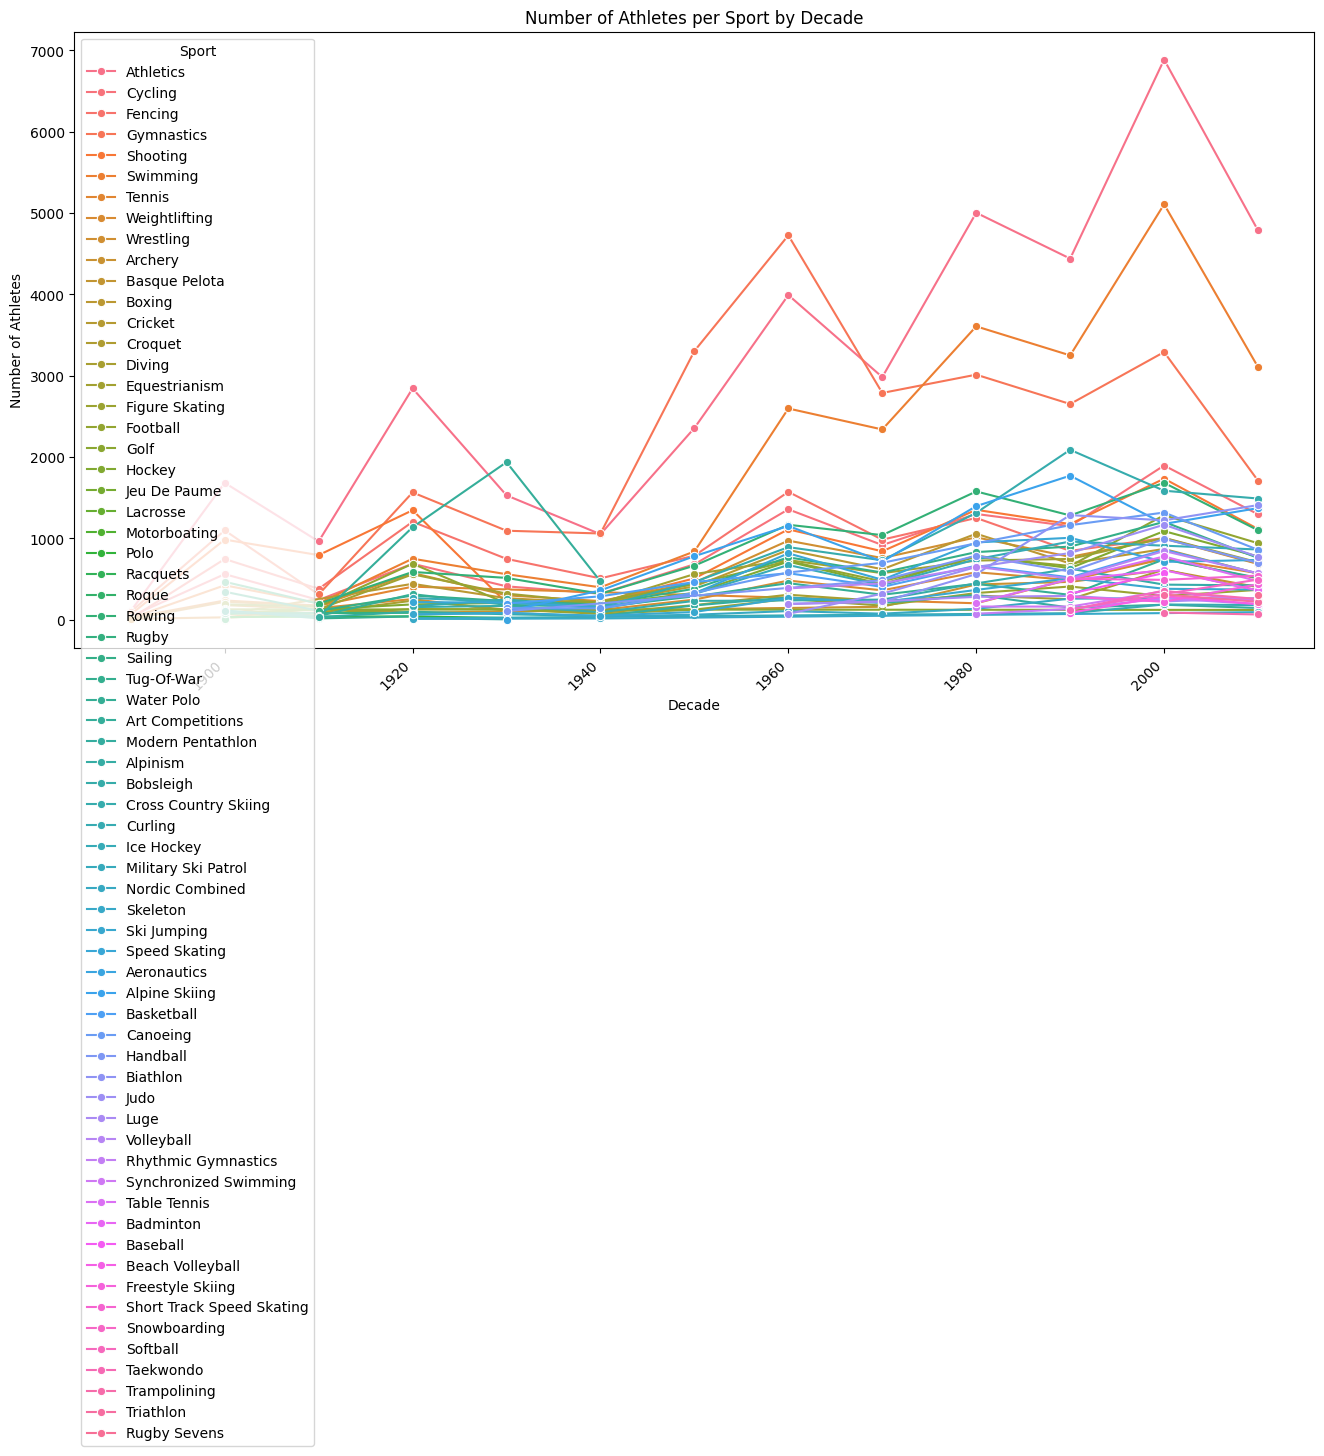

In [162]:
# prompt: what would be a better way to visualize the number of athletes per sport by decade?

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'decade_sport_counts' DataFrame is already created as in the previous code

plt.figure(figsize=(16, 8))
sns.lineplot(x='Decade', y='athlete_count', hue='Sport', data=decade_sport_counts, marker='o')
plt.title('Number of Athletes per Sport by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Time Series Analysis

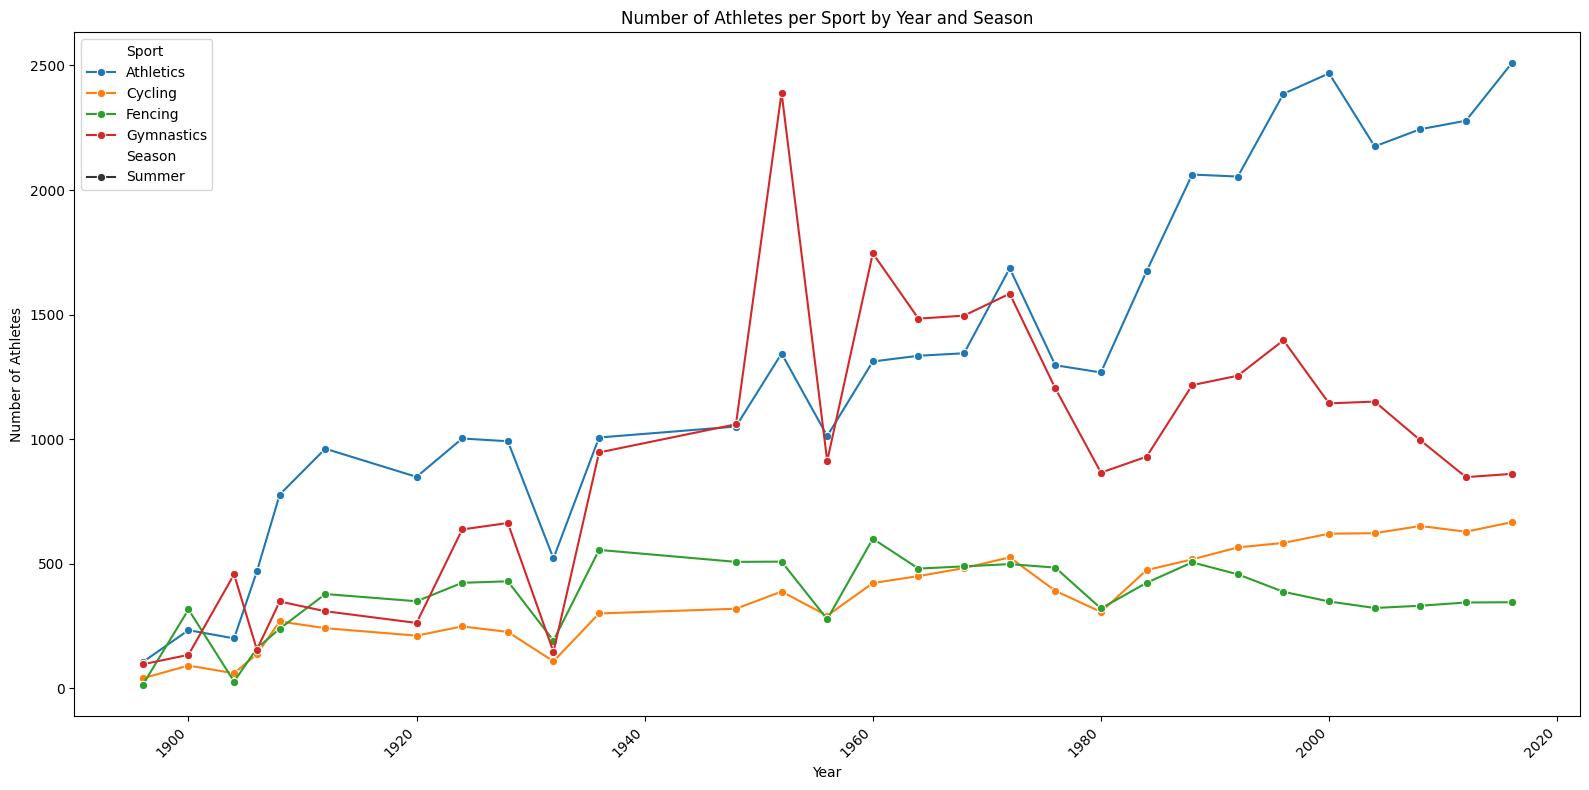

In [163]:
# prompt: create a line graph showing the number of athletes each year and season in the following sports: athletics, cycling, fencing, gymnastics

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it's already loaded and processed

# Filter for the specified sports
sports_to_plot = ['Athletics', 'Cycling', 'Fencing', 'Gymnastics']
filtered_df = df[df['Sport'].isin(sports_to_plot)]

# Group the data
athlete_counts = filtered_df.groupby(['Year', 'Season', 'Sport'])['ID'].count().reset_index()
athlete_counts = athlete_counts.rename(columns={'ID': 'Athlete_Count'})

# Create the line plot
plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Athlete_Count', hue='Sport', style='Season', data=athlete_counts, marker='o')
plt.title('Number of Athletes per Sport by Year and Season')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Displaying the total number of atheletes at each Olympics

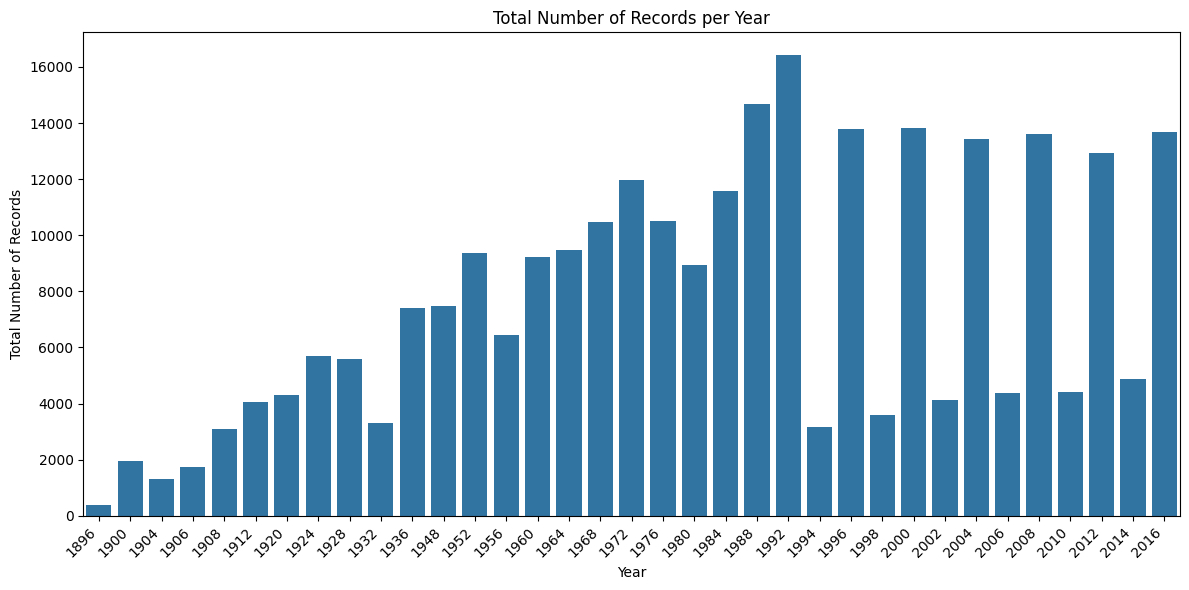

In [148]:
# prompt: create a bar chart that shows the total number of records for each year

# Assuming 'df' is your DataFrame from the previous code.
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by year and count the number of records in each year
records_per_year = df.groupby('Year')['ID'].count()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=records_per_year.index, y=records_per_year.values)
plt.xlabel('Year')
plt.ylabel('Total Number of Records')
plt.title('Total Number of Records per Year')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


<Figure size 1600x800 with 0 Axes>

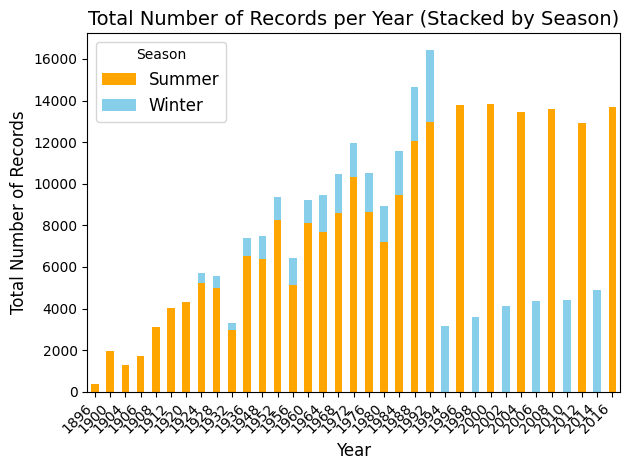

In [149]:
# prompt: Now color code the above bar chart with stacked bars for Season. Use a "cool" color for Winter and "warm" for Summer. make sure it is wide enough to read easily.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code.

# Group data by year and season, then count the number of records
records_per_year_season = df.groupby(['Year', 'Season'])['ID'].count().unstack()

# Create the stacked bar chart with custom colors
plt.figure(figsize=(16, 8))  # Increased figure size for better readability
records_per_year_season.plot(kind='bar', stacked=True, color={'Summer': 'orange', 'Winter': 'skyblue'})
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Records', fontsize=12)
plt.title('Total Number of Records per Year (Stacked by Season)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjusted font size and rotation
plt.legend(title='Season', fontsize=12) # Added legend title
plt.tight_layout()
plt.show()


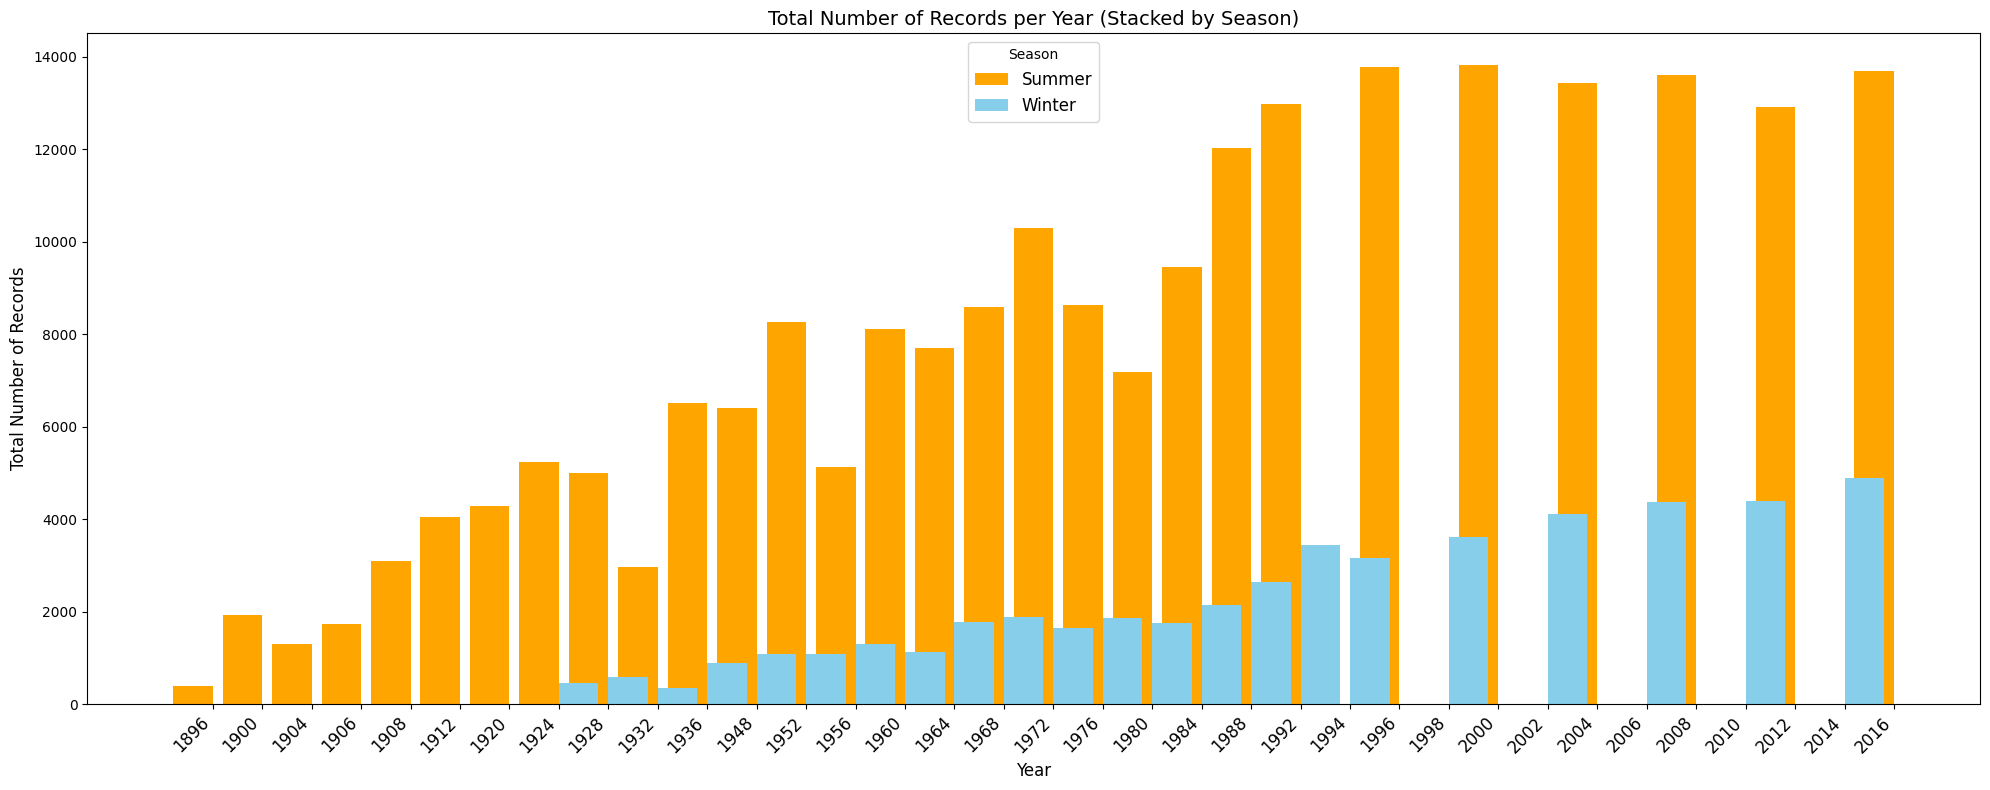

In [150]:
# prompt: adjust the above bar chart to make the bars twice as wide and spread out the x-axis so it is more readable

# Assuming 'df' is your DataFrame from the previous code.

# Group data by year and season, then count the number of records
records_per_year_season = df.groupby(['Year', 'Season'])['ID'].count().unstack()

# Create the stacked bar chart with custom colors and adjusted width
plt.figure(figsize=(20, 8))  # Increased figure size for better readability
bar_width = 0.8  # Adjust the width of the bars
x_positions = np.arange(len(records_per_year_season.index))

plt.bar(x_positions - bar_width/2, records_per_year_season['Summer'], width=bar_width, label='Summer', color='orange')
plt.bar(x_positions + bar_width/2, records_per_year_season['Winter'], width=bar_width, label='Winter', color='skyblue')


plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Records', fontsize=12)
plt.title('Total Number of Records per Year (Stacked by Season)', fontsize=14)

# Set x-axis ticks to be the years with more spacing
plt.xticks(x_positions, records_per_year_season.index, rotation=45, ha='right', fontsize=12)

plt.legend(title='Season', fontsize=12) # Added legend title
plt.tight_layout()
plt.show()


**Comment**: With some prompting and tweaking, I was able to get a nice looking stacked bar chart showing the number of records for each year, stacked by season. But how many unique athletes competed in each Olympics?

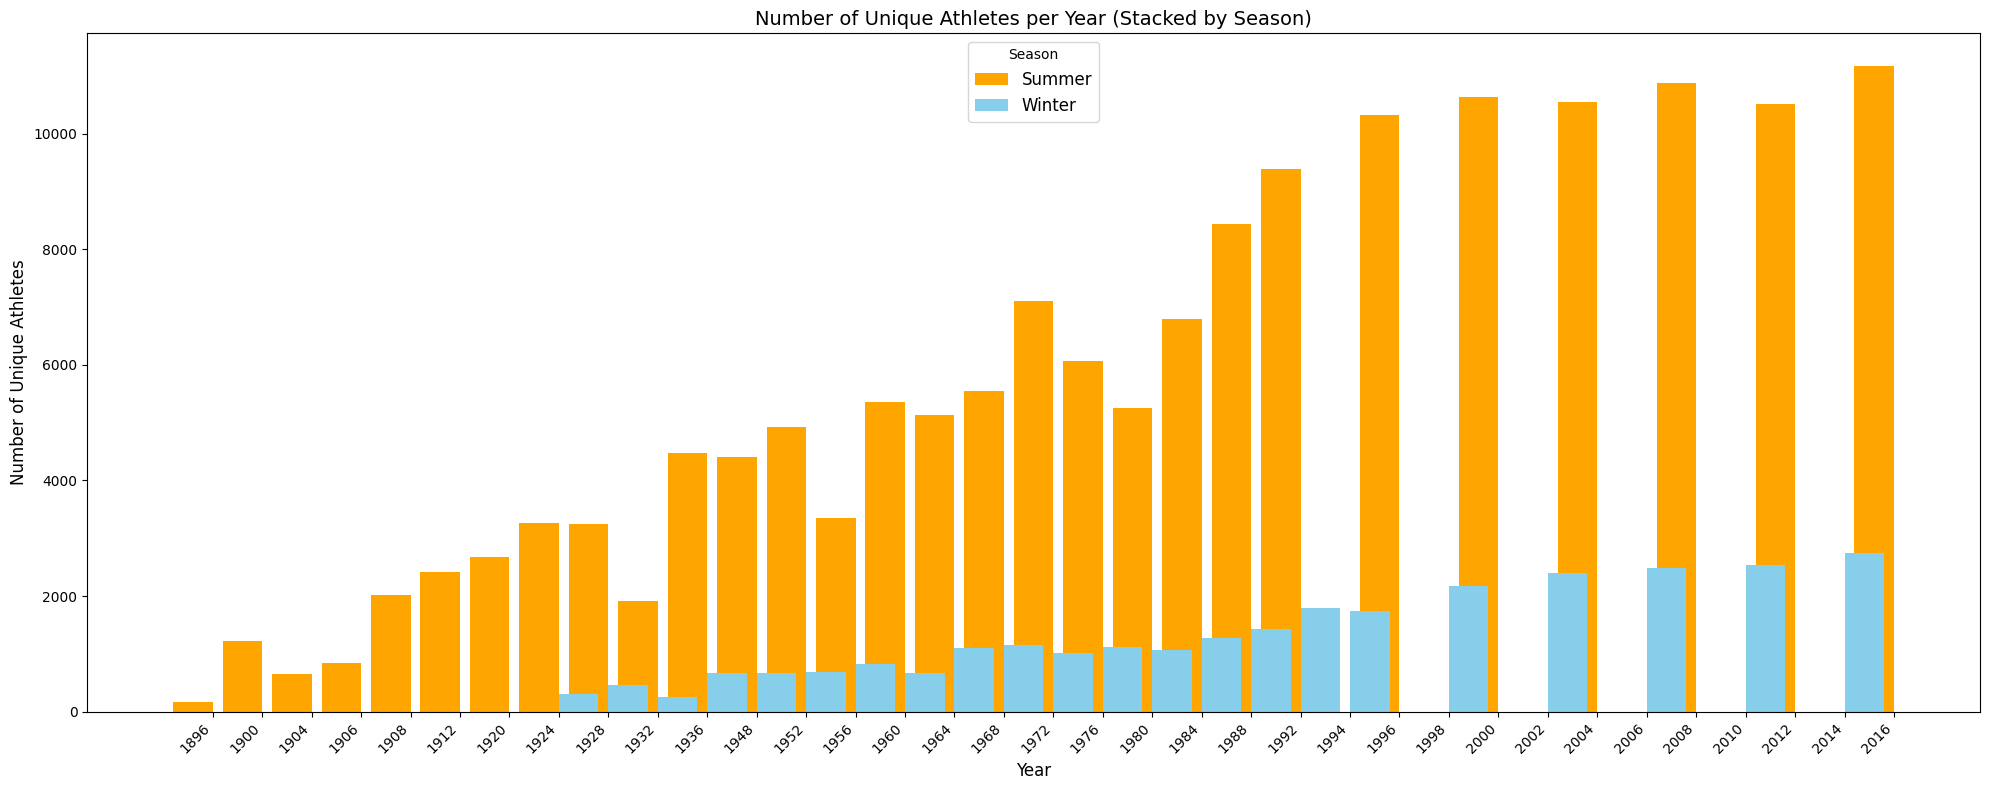

In [151]:
# prompt: modify the above bar chart so it displays the number of unique names in each Year and Season

# Assuming 'df' is your DataFrame from the previous code.

# Group data by year and season, then count the number of unique athletes
unique_athletes_per_year_season = df.groupby(['Year', 'Season'])['Name'].nunique().unstack()

# Create the stacked bar chart
plt.figure(figsize=(20, 8))
bar_width = 0.8
x_positions = np.arange(len(unique_athletes_per_year_season.index))

plt.bar(x_positions - bar_width/2, unique_athletes_per_year_season['Summer'], width=bar_width, label='Summer', color='orange')
plt.bar(x_positions + bar_width/2, unique_athletes_per_year_season['Winter'], width=bar_width, label='Winter', color='skyblue')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Athletes', fontsize=12)
plt.title('Number of Unique Athletes per Year (Stacked by Season)', fontsize=14)
plt.xticks(x_positions, unique_athletes_per_year_season.index, rotation=45, ha='right', fontsize=10)
plt.legend(title='Season', fontsize=12)
plt.tight_layout()
plt.show()


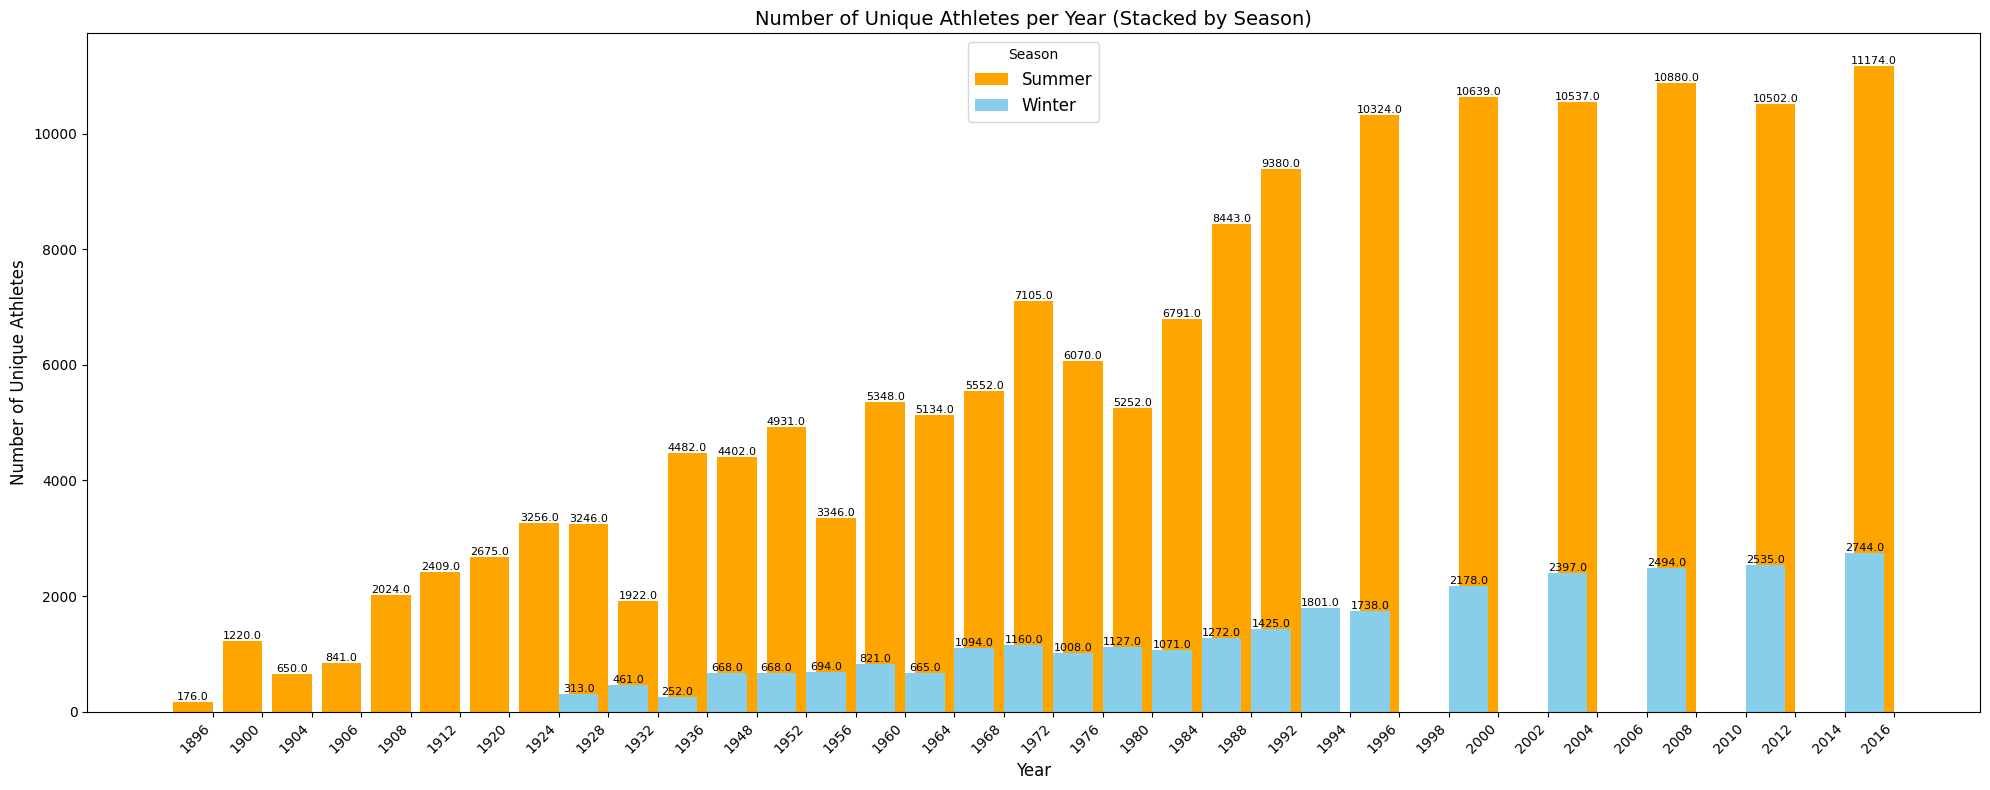

In [152]:
# prompt: add unobtrusive data labels to the above chart

import matplotlib.pyplot as plt

# Assuming 'unique_athletes_per_year_season' is your DataFrame from the previous code.

# Create the stacked bar chart
plt.figure(figsize=(20, 8))
bar_width = 0.8
x_positions = np.arange(len(unique_athletes_per_year_season.index))

summer_bars = plt.bar(x_positions - bar_width/2, unique_athletes_per_year_season['Summer'], width=bar_width, label='Summer', color='orange')
winter_bars = plt.bar(x_positions + bar_width/2, unique_athletes_per_year_season['Winter'], width=bar_width, label='Winter', color='skyblue')

# Add data labels to the bars
for bars in [summer_bars, winter_bars]:
  for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom', fontsize=8)


plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Athletes', fontsize=12)
plt.title('Number of Unique Athletes per Year (Stacked by Season)', fontsize=14)
plt.xticks(x_positions, unique_athletes_per_year_season.index, rotation=45, ha='right', fontsize=10)
plt.legend(title='Season', fontsize=12)
plt.tight_layout()
plt.show()


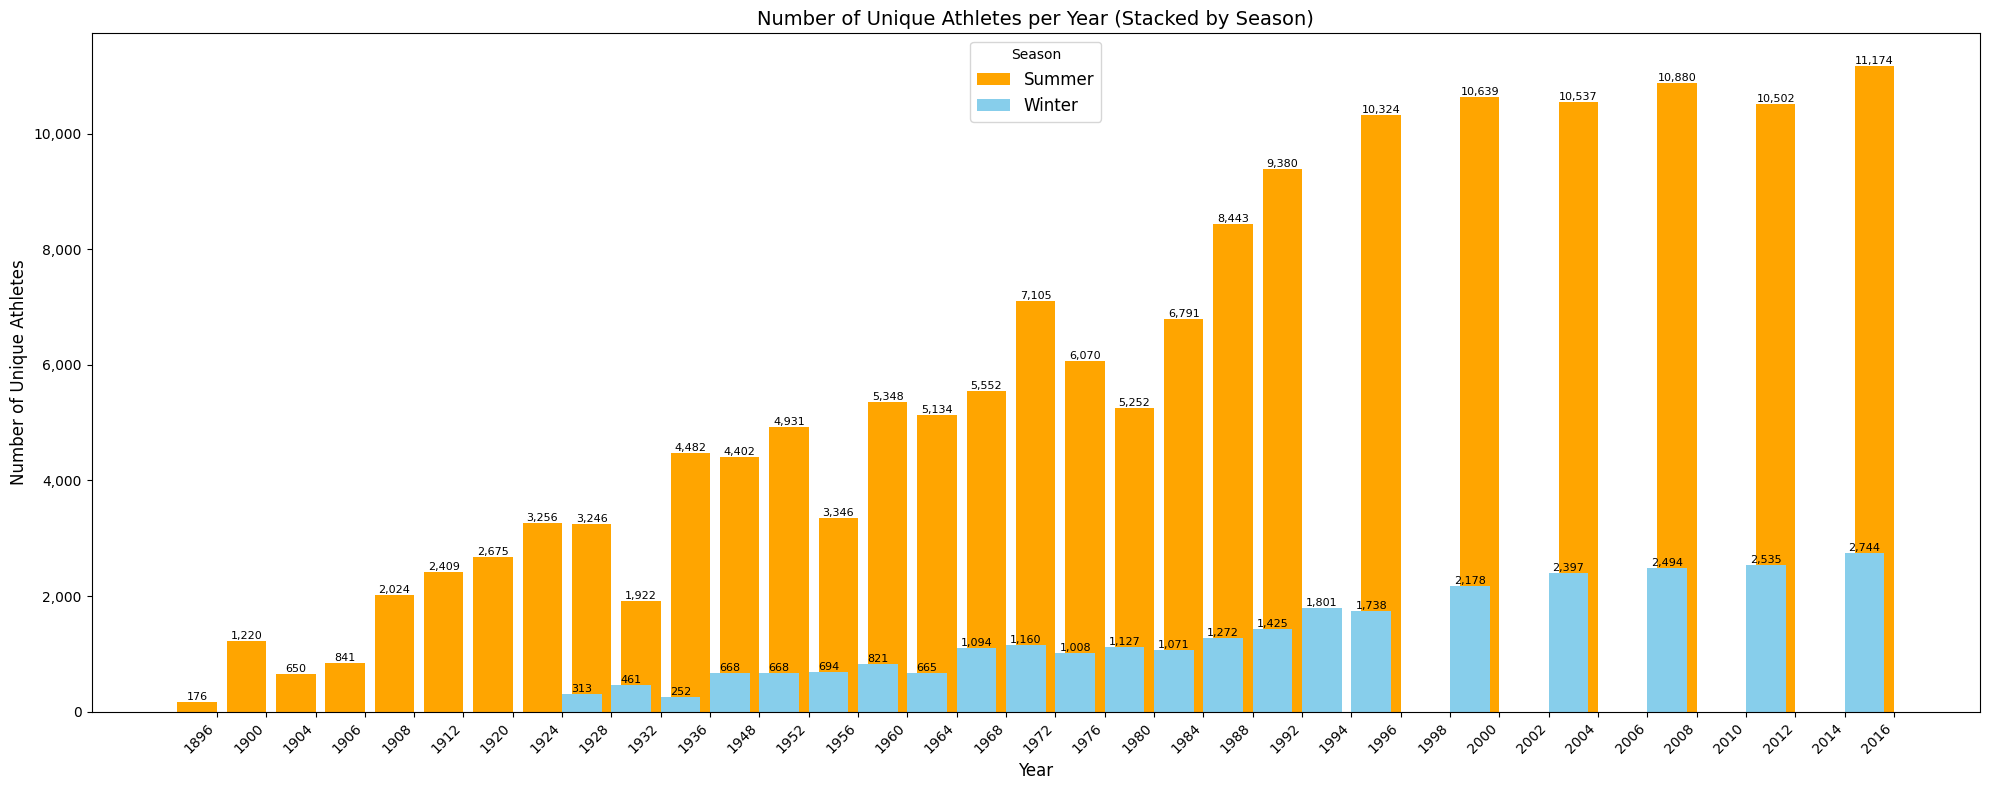

In [153]:
# prompt: display the data labels with thousands separators and with no trailing decimals

import matplotlib.ticker as ticker

# Assuming 'unique_athletes_per_year_season' is your DataFrame from the previous code.

# Create the stacked bar chart
plt.figure(figsize=(20, 8))
bar_width = 0.8
x_positions = np.arange(len(unique_athletes_per_year_season.index))

summer_bars = plt.bar(x_positions - bar_width/2, unique_athletes_per_year_season['Summer'], width=bar_width, label='Summer', color='orange')
winter_bars = plt.bar(x_positions + bar_width/2, unique_athletes_per_year_season['Winter'], width=bar_width, label='Winter', color='skyblue')

# Add data labels to the bars with thousands separators and no decimals, handling NaN values
for bars in [summer_bars, winter_bars]:
  for bar in bars:
    yval = bar.get_height()
    # Check if yval is NaN and skip if it is
    if not np.isnan(yval):
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom', fontsize=8)

# Format y-axis with thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Athletes', fontsize=12)
plt.title('Number of Unique Athletes per Year (Stacked by Season)', fontsize=14)
plt.xticks(x_positions, unique_athletes_per_year_season.index, rotation=45, ha='right', fontsize=10)
plt.legend(title='Season', fontsize=12)
plt.tight_layout()
plt.show()


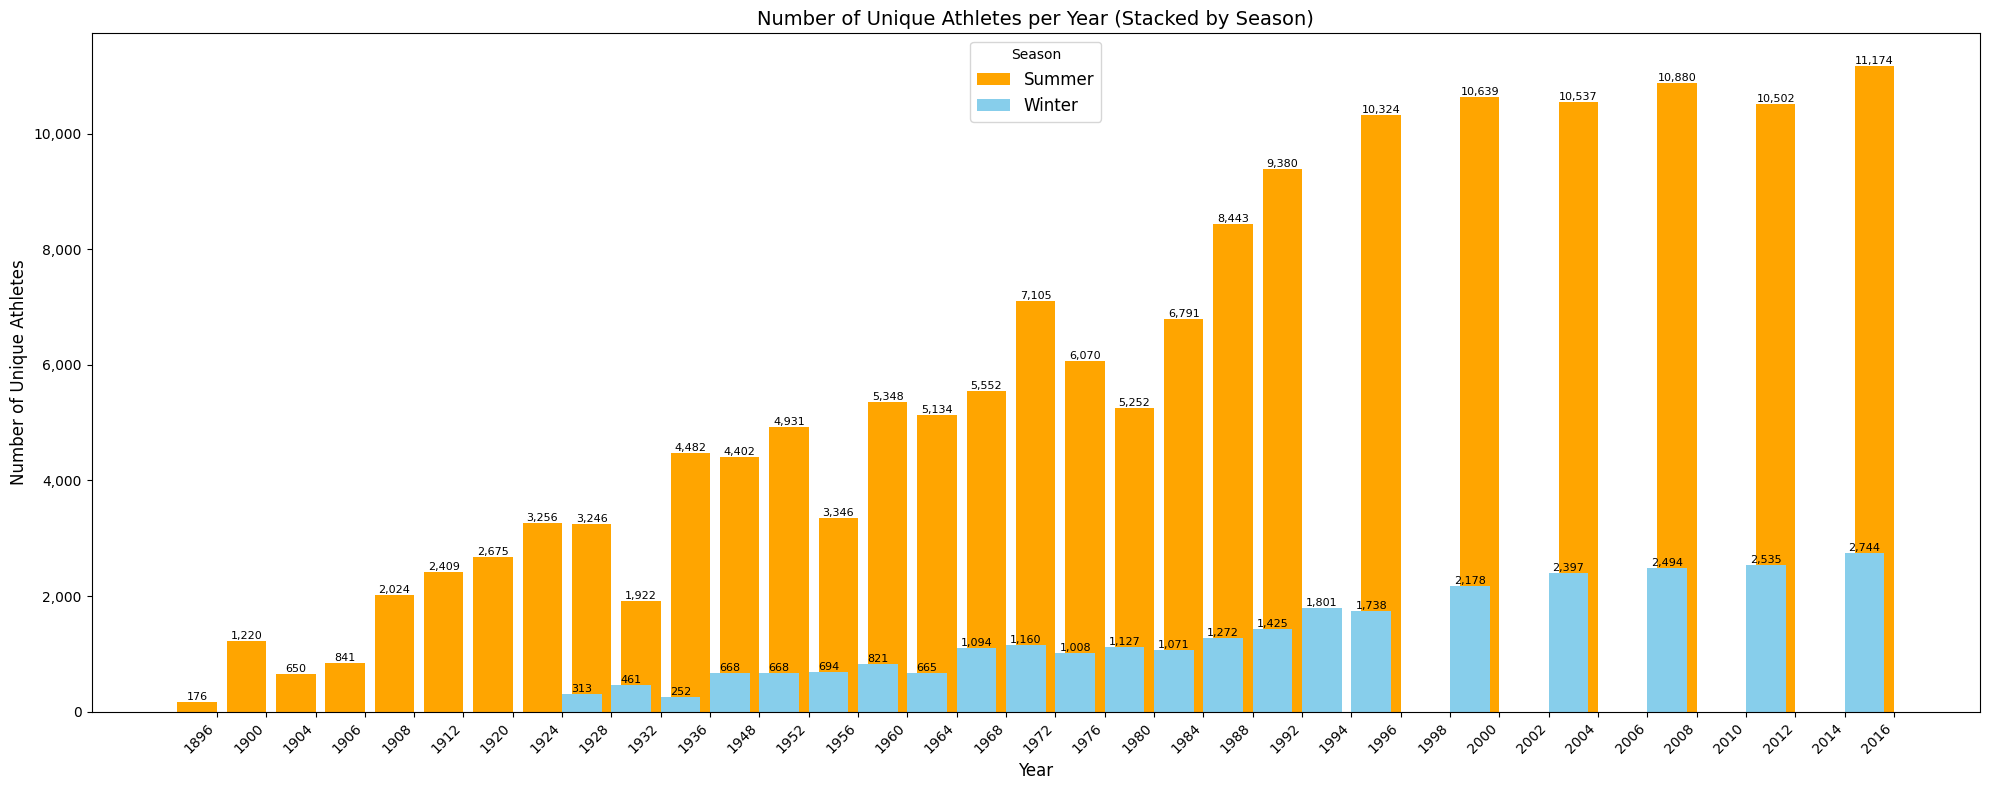

In [154]:
# prompt: display the data labels with thousands separators and with no trailing decimals

import matplotlib.ticker as ticker

# Assuming 'unique_athletes_per_year_season' is your DataFrame from the previous code.

# Create the stacked bar chart
plt.figure(figsize=(20, 8))
bar_width = 0.8
x_positions = np.arange(len(unique_athletes_per_year_season.index))

summer_bars = plt.bar(x_positions - bar_width/2, unique_athletes_per_year_season['Summer'], width=bar_width, label='Summer', color='orange')
winter_bars = plt.bar(x_positions + bar_width/2, unique_athletes_per_year_season['Winter'], width=bar_width, label='Winter', color='skyblue')

# Add data labels to the bars with thousands separators and no decimals, handling NaN values
for bars in [summer_bars, winter_bars]:
  for bar in bars:
    yval = bar.get_height()
    # Check if yval is NaN and skip if it is
    if not np.isnan(yval):
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom', fontsize=8)

# Format y-axis with thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Athletes', fontsize=12)
plt.title('Number of Unique Athletes per Year (Stacked by Season)', fontsize=14)
plt.xticks(x_positions, unique_athletes_per_year_season.index, rotation=45, ha='right', fontsize=10)
plt.legend(title='Season', fontsize=12)
plt.tight_layout()
plt.show()

Comment: Gemini is impressive. I asked it to add comma separators and remove trailing decimals, but it ran into an issue with converting "NaN" values to integers. However, it was quickly able to generate a logic loop enabling the code to skip NaN values, with a satisfactory result.

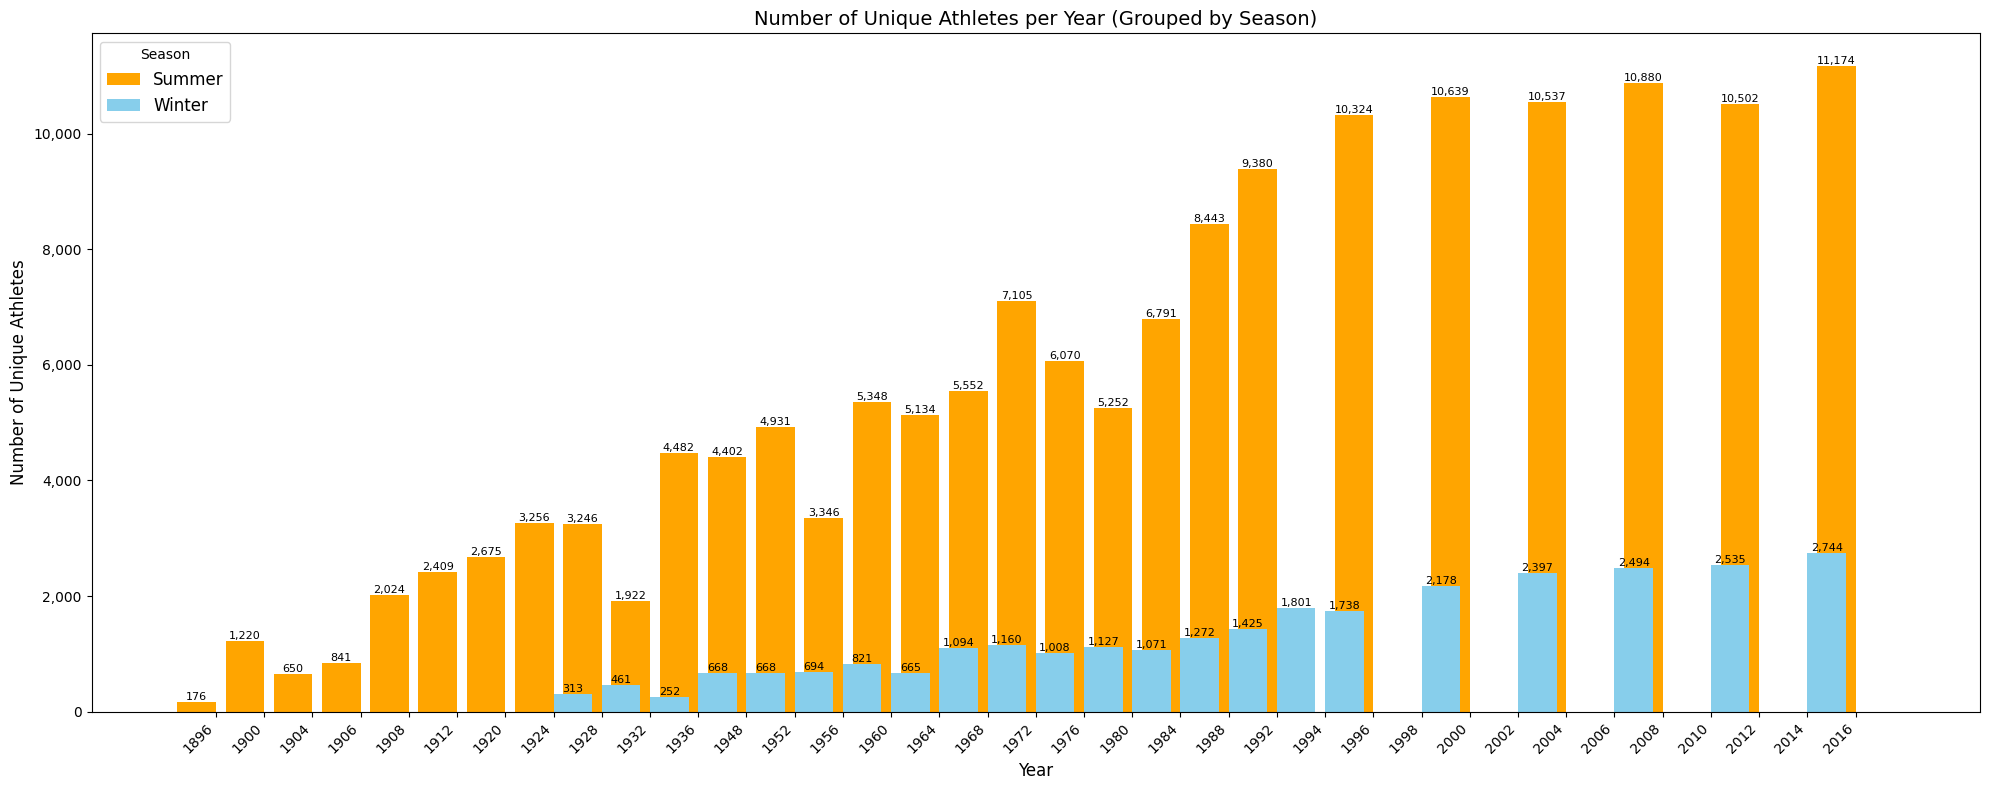

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming 'unique_athletes_per_year_season' is your DataFrame
plt.figure(figsize=(20, 8))
bar_width = 0.8
x_positions = np.arange(len(unique_athletes_per_year_season.index))

# Handle NaN values upfront
unique_athletes_per_year_season = unique_athletes_per_year_season.fillna(0)

# Create bars
summer_bars = plt.bar(x_positions - bar_width/2, unique_athletes_per_year_season['Summer'],
                       width=bar_width, label='Summer', color='orange')
winter_bars = plt.bar(x_positions + bar_width/2, unique_athletes_per_year_season['Winter'],
                       width=bar_width, label='Winter', color='skyblue')

# Add data labels with thousands separators
for bars in [summer_bars, winter_bars]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Skip zero values
            plt.text(bar.get_x() + bar.get_width()/2, yval, format(int(yval), ","),
                     ha='center', va='bottom', fontsize=8)

# Format y-axis with thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Athletes', fontsize=12)
plt.title('Number of Unique Athletes per Year (Grouped by Season)', fontsize=14)
plt.xticks(x_positions, unique_athletes_per_year_season.index, rotation=45, ha='right', fontsize=10)
plt.legend(title='Season', fontsize=12)
plt.tight_layout()
plt.show()


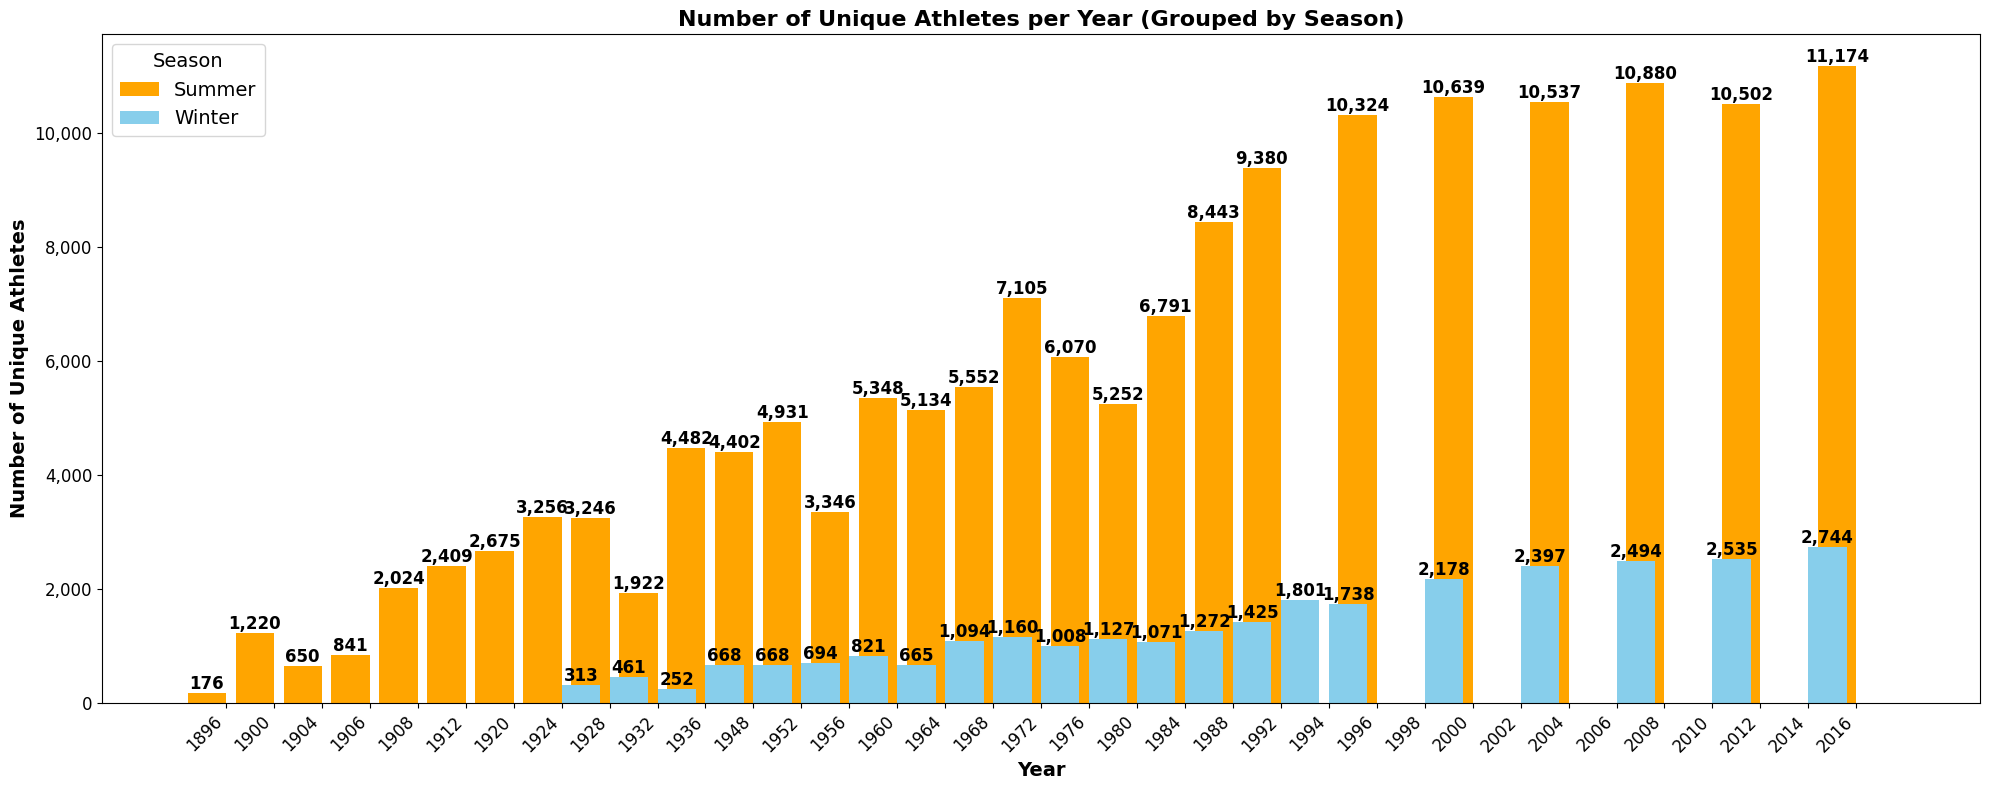

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming 'unique_athletes_per_year_season' is your DataFrame
plt.figure(figsize=(20, 8))
bar_width = 0.8
x_positions = np.arange(len(unique_athletes_per_year_season.index))

# Handle NaN values upfront
unique_athletes_per_year_season = unique_athletes_per_year_season.fillna(0)

# Create bars
summer_bars = plt.bar(x_positions - bar_width/2, unique_athletes_per_year_season['Summer'],
                       width=bar_width, label='Summer', color='orange')
winter_bars = plt.bar(x_positions + bar_width/2, unique_athletes_per_year_season['Winter'],
                       width=bar_width, label='Winter', color='skyblue')

# Add data labels with thousands separators, larger font
for bars in [summer_bars, winter_bars]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Skip zero values
            plt.text(bar.get_x() + bar.get_width()/2, yval, format(int(yval), ","),
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

# Format y-axis with thousands separators
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Labels and title with larger fonts
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Unique Athletes', fontsize=14, fontweight='bold')
plt.title('Number of Unique Athletes per Year (Grouped by Season)', fontsize=16, fontweight='bold')

# Increase tick label sizes
plt.xticks(x_positions, unique_athletes_per_year_season.index, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Increase legend font size
plt.legend(title='Season', fontsize=14, title_fontsize=14)

plt.tight_layout()
plt.show()


**Comment**: While Gemini was impressive, ChatGPT may be even better and easier to work with. I asked it to comment on Gemini's approach and it made several suggestions, which it explained and then incorporated into a revised piece of code. I'm not sure the built-in Gemini could do that. It was also very easy to get larger data labels.